In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%%time
file_path = 'GT_IPI.parquet'
df = pd.read_parquet(file_path, engine='pyarrow')

CPU times: total: 16.5 s
Wall time: 3.7 s


In [3]:
df= pd.get_dummies(df
                            , columns=['target']\
                            , prefix=['target'] )

In [4]:
numeric_columns = df.select_dtypes(include=[np.number, bool])
numeric_columns.head()

,customer_pk,is_italic,is_bold,is_underline,form_rel_depth,form_rel_font_size,form_font_family_mode_ind,form_font_colour_mode_ind,lang_num_sents,lang_num_words,...,lang_pct_wh_determiner,lang_pct_wh_pronoun,lang_pct_possessive_wh_pronoun,lang_pct_wh_abverb,lang_pct_punct,lang_pct_sym,target_discarded,target_question,target_section,target_subsection
0,1855,0,0,0,82,1,0,1,1,17,...,0.0,0.0,0.0,0.0,0.176471,0.0,False,True,False,False
1,1855,0,0,0,82,1,1,1,1,26,...,0.0,0.0,0.0,0.0,0.076923,0.0,True,False,False,False
2,1855,0,0,0,83,1,1,1,1,26,...,0.0,0.0,0.0,0.0,0.076923,0.0,True,False,False,False
3,1855,0,0,0,84,1,0,1,1,10,...,0.0,0.0,0.0,0.0,0.200000,0.0,False,True,False,False
4,1855,0,0,0,84,1,1,1,1,16,...,0.0,0.0,0.0,0.0,0.000000,0.0,True,False,False,False


In [6]:
corr_matrix = numeric_columns.corr()
corr_matrix.head()

,customer_pk,is_italic,is_bold,is_underline,form_rel_depth,form_rel_font_size,form_font_family_mode_ind,form_font_colour_mode_ind,lang_num_sents,lang_num_words,...,lang_pct_wh_determiner,lang_pct_wh_pronoun,lang_pct_possessive_wh_pronoun,lang_pct_wh_abverb,lang_pct_punct,lang_pct_sym,target_discarded,target_question,target_section,target_subsection
customer_pk,1.000000,0.004845,0.007222,0.006397,0.025988,0.001037,0.007444,-0.017282,0.025562,0.026048,...,-0.001780,0.001761,-0.000148,-0.003165,0.009047,-0.009166,0.004098,-0.005346,0.009814,-0.007273
is_italic,0.004845,1.000000,0.056641,0.054110,-0.001254,-0.003445,-0.006355,-0.060816,0.000212,0.000124,...,-0.000688,-0.012060,0.001154,-0.006459,0.024974,-0.000530,0.032197,-0.047733,0.014658,0.030468
is_bold,0.007222,0.056641,1.000000,0.106807,0.012109,0.050084,-0.012087,-0.124494,0.000804,-0.003622,...,-0.038091,-0.028442,-0.003314,-0.034655,0.017548,-0.003462,0.041488,-0.112714,0.126363,0.086022
is_underline,0.006397,0.054110,0.106807,1.000000,-0.008280,0.027549,-0.025689,-0.040101,0.004836,0.005074,...,-0.012034,-0.018437,0.003555,-0.019496,-0.001934,-0.002563,0.010421,-0.062713,0.097609,0.060029
form_rel_depth,0.025988,-0.001254,0.012109,-0.008280,1.000000,-0.003943,0.008537,0.005302,0.302101,0.277967,...,0.000398,-0.001363,-0.000668,-0.000551,0.002457,0.001068,0.030655,-0.024028,-0.013001,-0.010455


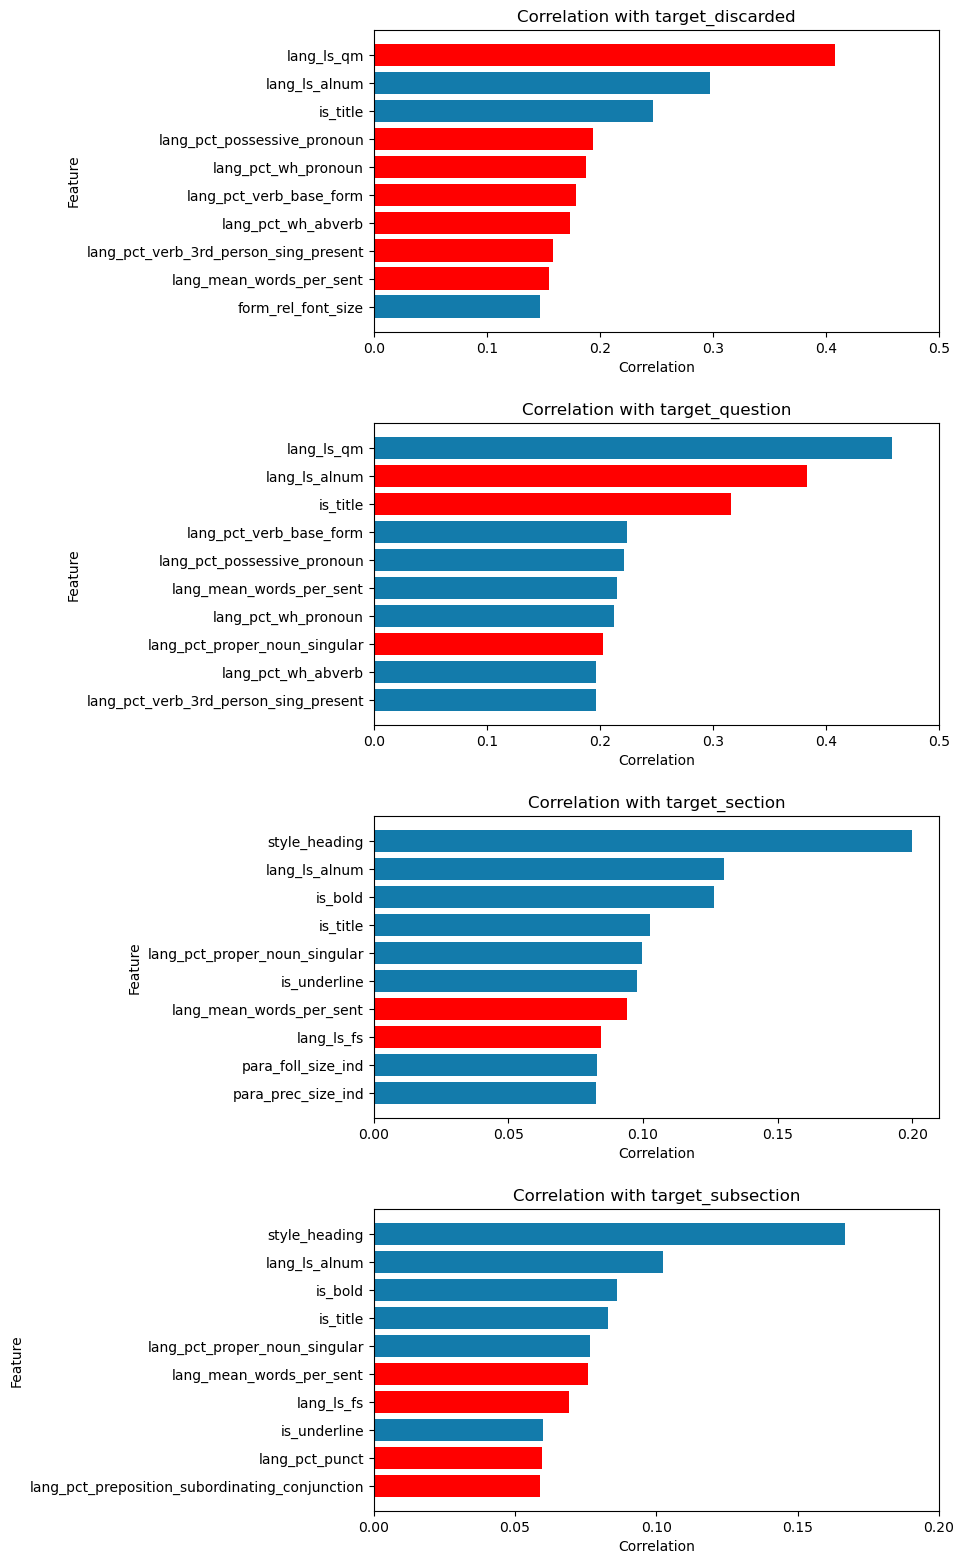

In [8]:
targets = ['target_discarded', 'target_question', 'target_section', 'target_subsection']

fig, axes = plt.subplots(nrows=len(targets), figsize=(10, 4 * len(targets))) 

ticks_discarded_question = [0, 0.10, 0.20, 0.30, 0.40, 0.50]
ticks_section_subsection = [0, 0.05, 0.10, 0.15, 0.20]

for i, target in enumerate(targets):
    corr_values = corr_matrix.abs()[target].drop(targets).sort_values(ascending=False)[0:10]
    original_corr = corr_matrix[target].drop(targets).reindex(corr_values.index)
    colors = ['red' if corr < 0 else '#137bab' for corr in original_corr] 
    
    axes[i].barh(corr_values.index, corr_values, height=0.8, color=colors)  
    axes[i].set_xlabel('Correlation')
    axes[i].set_ylabel('Feature')
    axes[i].set_title(f'Correlation with {target}')
    axes[i].invert_yaxis()  
    
    if target in ['target_discarded', 'target_question']:
        axes[i].set_xticks(ticks_discarded_question)
    elif target in ['target_section', 'target_subsection']:
        axes[i].set_xticks(ticks_section_subsection)

plt.tight_layout(pad=2.0)
plt.savefig('correlation_plots.png', dpi=300)

plt.show()


In [9]:
#correlation pairs
numeric_columns = df.select_dtypes(include=[np.number])
corr_matrix = numeric_columns.corr().abs()

mask = ~np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)

correlation_pairs = [(corr_matrix.columns[i], corr_matrix.columns[j], corr_matrix.iloc[i, j])
                     for i, j in zip(*np.where(mask))]
correlation_pairs_sorted = sorted(correlation_pairs, key=lambda x: x[2], reverse=True)

for pair in correlation_pairs_sorted:
    print(f"{pair[0]} - {pair[1]} : {pair[2]}")

customer_pk - customer_pk : 1.0
is_italic - is_italic : 1.0
is_bold - is_bold : 1.0
is_underline - is_underline : 1.0
form_rel_depth - form_rel_depth : 1.0
form_rel_font_size - form_rel_font_size : 1.0
form_font_family_mode_ind - form_font_family_mode_ind : 1.0
form_font_colour_mode_ind - form_font_colour_mode_ind : 1.0
lang_num_sents - lang_num_sents : 1.0
lang_num_words - lang_num_words : 1.0
lang_mean_words_per_sent - lang_mean_words_per_sent : 1.0
lang_ls_alnum - lang_ls_alnum : 1.0
lang_ls_qm - lang_ls_qm : 1.0
lang_ls_fs - lang_ls_fs : 1.0
lang_ls_clscl - lang_ls_clscl : 1.0
lang_ls_brkt - lang_ls_brkt : 1.0
para_prec_depth_ind - para_prec_depth_ind : 1.0
para_foll_depth_ind - para_foll_depth_ind : 1.0
para_prec_size_ind - para_prec_size_ind : 1.0
para_foll_size_ind - para_foll_size_ind : 1.0
para_prec_bold_ind - para_prec_bold_ind : 1.0
para_foll_bold_ind - para_foll_bold_ind : 1.0
para_prec_italic_ind - para_prec_italic_ind : 1.0
para_foll_italic_ind - para_foll_italic_ind : 1.